In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats

In [4]:
import Sim_random_pick_out_of_battery_trip_dest_selection
from datetime import timedelta as td
from datetime import datetime as time

suppose we just need a subset of stations to be ebike stations

In [3]:
p = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

stations_ranked is a data file that sorted the stations by their demand (popularity) (= tripsin+tripsout+tripsfailedin+tripsfailedout)

In [10]:
stations_ranked = pd.read_csv("stations.csv")
stations_ranked.head()

,stationid,tripsin,tripsout,tripsfailedin,tripsfailedout,tripsfailedout_battery,trips_failedout_destinationfull,station_capacity,demand,percent
0,519,68062,68086,66,13003,0,1723,61,149217,0.008820
1,426,59633,59645,3078,8907,0,1336,29,131263,0.007759
2,497,54780,54794,578,5234,0,1195,59,115386,0.006820
3,514,48941,48929,1088,9459,0,855,52,108417,0.006408
4,435,49798,49817,160,5577,0,997,47,105352,0.006227


In [11]:
total_stations = len(stations_ranked)
total_stations

823

In [33]:
initial_stations=eval(open(("stations_initial.txt")).read())

Still assume 40% of the fleet size have e-bikes. Also we assume that if a station is chosen to be ebike station, then all docks are electrified.

The code in the following block is trying to get the steady state after 30-week simulation, assuming we choose p percent of stations to be electrified. The first p-percent of stations in the stations_ranked list was selected to be the ebike stations in this simulation.

In [8]:
from copy import deepcopy
initial_stations_copy = deepcopy(initial_stations)

In [35]:
num_ebike = 0.4
for percent in p:
    # number of stations we pick to electrify
    num_estation = int(total_stations*percent)
    subset = stations_ranked['stationid'][0:num_estation]
    print(subset)
    
    for station in initial_stations.keys():
        initial_stations[station]['ecap']= initial_stations[station]['cap']
        #print(initial_stations[station]['cap'])
        initial_stations[station]['ebike']=round(initial_stations[station]['ecap']*num_ebike)
        initial_stations[station]['bike']=0
        initial_stations[station]['cap']=0
        if station in subset:
            initial_stations[station]['edock'] = initial_stations[station]['ecap']
        else:
            initial_stations[station]['edock'] = 0
    
    start_time = time(2017,7,1,hour= 6)
    end_time=start_time+ td(weeks=30)
    gc=Sim_random_pick_out_of_battery_trip_dest_selection.GlobalClock(start_time,end_time,initial_stations)
    gc.clockAdvance() 
    steady = {}
    for i in gc.stations.keys(): 
        temp={}   
        temp['ebike'] = len(gc.stations[i].ebike)
        temp['ecap'] = gc.stations[i].ebike_cap
        temp['edock'] = gc.stations[i].edock
        temp['bike'] = 0
        temp['cap'] = 0
        steady[i] = temp

    f = open("steady_states_p/stations_initial_"+str(percent)+".txt","w")
    f.write(str(steady))
    f.close()
    initial_stations = deepcopy(initial_stations_copy)

0       519
1       426
2       497
3       514
4       435
5       459
6       402
7       490
8      3255
9       285
10     3002
11      368
12      523
13      293
14      151
15     2006
16      387
17      477
18      358
19      284
20      168
21      382
22      229
23      281
24     3263
25      444
26      327
27      505
28     3256
29      499
       ... 
299    3462
300    3318
301    3243
302    3113
303     384
304    3096
305     454
306    3178
307    3169
308    3232
309     157
310    3320
311     411
312    3162
313     393
314     302
315    3474
316     414
317    3177
318    3288
319    3110
320    3350
321    3447
322     332
323    3301
324    3170
325    3362
326    3286
327    3285
328     356
Name: stationid, Length: 329, dtype: int64
the total number of ebikes: 10149
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
2017-07-08 06:00:01.295825 1
2017-07-15 06:00:05.899528 2
2017-07-22 06:00:01.666247 3
2017-07-29 06:00:00.233171 4
2017-08-0

For each percentage p, we pick a subset of stations to be electrified by their (as destination) number of out-of-battery events

In [1]:
import Sim_random_pick_CRN

In [5]:
start_time = time(2017,7,1,hour= 6)
end_time=start_time+ td(days=1)

In [2]:
from copy import deepcopy

In [8]:
percent = 0.9
steady_initial_stations=eval(open(("steady_states_p/stations_initial_"+str(percent)+".txt")).read())
for station in steady_initial_stations.keys():
    steady_initial_stations[station]['edock'] = 0
steady_initial_stations_copy = deepcopy(steady_initial_stations)

In [12]:
num_estation = int(total_stations*percent)
subset = []
for i in range(num_estation):
    gc=Sim_random_pick_CRN.GlobalClock(start_time,end_time,steady_initial_stations)
    gc.clockAdvance()
    dest_count = {}
    for sta in gc.stations.keys():
        dest_count[sta] = gc.stations[sta].dest_out_of_battery
    sorted_dest_count_list = sorted(dest_count.items(), key=lambda kv: kv[1],reverse = True)
    j = 0
    while (sorted_dest_count_list[j][0] in subset):
        j += 1
    max_statn = sorted_dest_count_list[j][0]
    subset.append(max_statn)
    steady_initial_stations_copy[max_statn]['edock'] = steady_initial_stations_copy[max_statn]['ecap']
    steady_initial_stations = deepcopy(steady_initial_stations_copy)
    #print(len(subset))

the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
the total number of ebikes: 10093
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0


In [22]:
subset9 = np.array(subset)

In [24]:
subset9

array([ 426,  514,  368, 3203,  380, 2008,  477, 3002, 3183,  532, 3267,
        457, 3186, 3256,  529,  504,  383, 3211,  448, 3137,  519, 3199,
        363, 3213,  361,  479, 3185,  433,  279,  507,  432,  499,  387,
       2006,  358, 3192,  459,  423,  527,  237,  382,  497,  295,  509,
       3254, 3187, 3163,  173,  327, 3205,  223,  417,  297, 3295, 3178,
        435,  545, 3202,  281,  470,  450, 3160, 3214, 3354, 3374,  355,
         72, 3135,  267, 3168,  334,  412, 3273,  401,  487,  490, 3275,
        251,  212, 3184, 3140, 3383,  195,  264,  293,  326,  331,  442,
        152,  525, 3276,  537, 3314, 3435,  403,  474,  518,  315,  480,
        540,  491,  153,  164,  244,  284, 3301, 3158,  128,  151, 3132,
       3458,  236,  276,  306,  312,  336,  398,  415,  447,  454,  462,
        468,  478,  492,  502,  531, 2010, 2023, 3145, 3165, 3427,  458,
       3180, 3194, 3226, 3255, 3309, 3316, 3398, 3428,  494, 3169,  351,
        168,  505,  248,  274,  317,  369,  385,  4

In [26]:
import  

In [ ]:
start_time = time(2017,7,1,hour= 6)
end_time=start_time+ td(weeks=50)
num_ebike = 0.4
p = [0.7,0.8,0.9]
for ele in p:
    s = subset9[0:int(total_stations*ele)]
    initial_stations=eval(open(("stations_initial.txt")).read())
    for station in initial_stations.keys():
        initial_stations[station]['ecap']= initial_stations[station]['cap']
        initial_stations[station]['ebike']=round(initial_stations[station]['ecap']*num_ebike)
        initial_stations[station]['bike']=0
        initial_stations[station]['cap']=0
        # to change subset1
        if station in s:
            initial_stations[station]['edock'] = initial_stations[station]['ecap']
        else:
            initial_stations[station]['edock'] = 0
    gc=Sim_random_pick_CRN1.GlobalClock(start_time,end_time,initial_stations)
    gc.clockAdvance() 

    # demand_loss
    w_demandlost=list(gc.week_demandlost.values())[2:]

    # return_error (destiniation full)
    w_ebike_return_full=list(gc.week_ebike_return_full.values())[2:]

    # out_of_battery
    w_average_SOC=list(gc.week_average_SOC.values())[2:]
    w_out_of_battery=list(gc.week_out_of_battery.values())[2:]

    # e-trips
    w_num_etrip=list(gc.week_num_etrip.values())[2:]
    #w_num_alltrip=list(gc.week_num_alltrip.values())[2:]

    # to change 0.1
    x=range(0,len(w_demandlost))    
    with open('simdata5/measurements'+str(ele)+'.csv','w') as f:
        f.write('week,ebike_return_error,lost_demand,out_of_battery_trips,ebike_trips\n')
        for week in x:
            f.write(str(week+1)+','+str(w_ebike_return_full[week])+','+str(w_demandlost[week])+','
                +str(w_out_of_battery[week])+','+str(w_num_etrip[week])+'\n')   

the total number of ebikes: 10149
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
2017-07-08 06:00:00.939395 1
2017-07-15 06:00:05.758092 2


In [33]:
import csv

csvfile = "subset.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in subset9:
        writer.writerow([val])

In [2]:
import csv
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

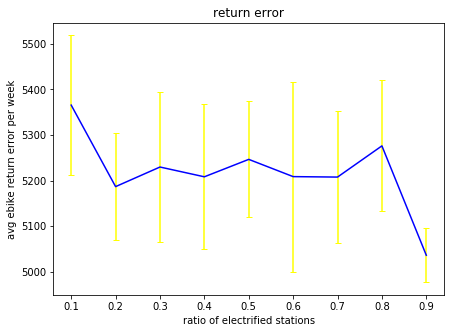

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
propotion_of_bike_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
bike_return_error=[]
bike_return_error_st=[]
for proportion in propotion_of_bike_list:
    s='data/measurement'+str(proportion)+'.csv'
    a= pd.read_csv(s)
    b=list((a.ebike_return_error))[15:]
    average_five_week  = []
    for i in range(7):
        average_five_week.append(sum(b[(5*i):(5*i+5)])/5)
    mean, error=mean_confidence_interval(average_five_week)
    bike_return_error.append(mean)
    bike_return_error_st.append(error)
#plt.plot(propotion_of_bike_list,bike_return_error, 'b',label = 'still happen')
plt.errorbar(propotion_of_bike_list,bike_return_error,yerr=bike_return_error_st,ecolor='yellow',capsize=3,color = 'b')    
plt.xlabel('ratio of electrified stations')
plt.ylabel('avg ebike return error per week')
plt.title('return error')
plt.savefig('return_error_benchmark',dpi  = 300, bbox_inches = 'tight')

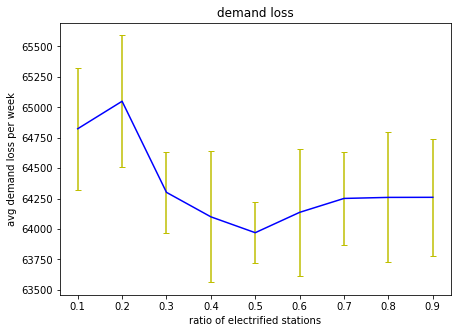

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
propotion_of_bike_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
bike_demand_loss=[]
bike_demand_loss_st=[]
for proportion in propotion_of_bike_list:
    s='data/measurement'+str(proportion)+'.csv'
    a= pd.read_csv(s)
    b=list((a.lost_demand))[15:]
    average_five_week  = []
    for i in range(7):
        average_five_week.append(sum(b[(5*i):(5*i+5)])/5)
    mean, error=mean_confidence_interval(average_five_week)
    bike_demand_loss.append(mean)
    bike_demand_loss_st.append(error)
#plt.plot(propotion_of_bike_list,bike_demand_loss, 'b',label = 'still happen')
plt.errorbar(propotion_of_bike_list,bike_demand_loss,yerr=bike_demand_loss_st,ecolor='y',capsize=3, color = 'b')    
plt.xlabel('ratio of electrified stations')
plt.ylabel('avg demand loss per week')
plt.title('demand loss')
plt.savefig('demand_loss_benchmark',dpi  = 300, bbox_inches = 'tight')

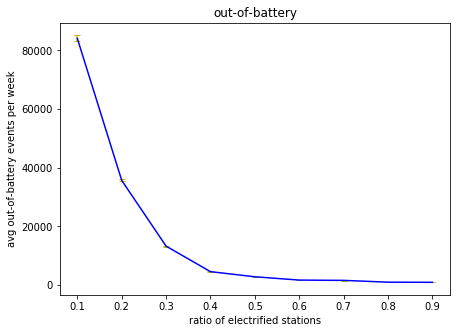

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
propotion_of_bike_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
bike_battery=[]
bike_battery_st=[]
for proportion in propotion_of_bike_list:
    s='data/measurement'+str(proportion)+'.csv'
    a= pd.read_csv(s)
    b=list((a.out_of_battery_trips))[15:]
    average_five_week  = []
    for i in range(7):
        average_five_week.append(sum(b[(5*i):(5*i+5)])/5)
    mean, error=mean_confidence_interval(average_five_week)
    bike_battery.append(mean)
    bike_battery_st.append(error)
plt.errorbar(propotion_of_bike_list,bike_battery,yerr=bike_battery_st,ecolor='y',capsize=3, color = 'b')    
plt.xlabel('ratio of electrified stations')
plt.ylabel('avg out-of-battery events per week')
plt.title('out-of-battery')
plt.savefig('out-of-battery_benchmark',dpi  = 300, bbox_inches = 'tight')

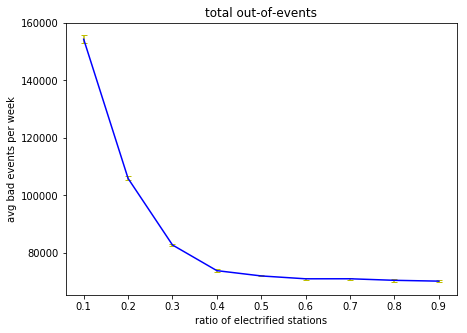

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
propotion_of_bike_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
bike_battery=[]
bike_battery_st=[]
for proportion in propotion_of_bike_list:
    s='data/measurement'+str(proportion)+'.csv'
    a= pd.read_csv(s)
    b=list((a.lost_demand)+(a.ebike_return_error)+(a.out_of_battery_trips))[15:]
    average_five_week  = []
    for i in range(7):
        average_five_week.append(sum(b[(5*i):(5*i+5)])/5)
    mean, error=mean_confidence_interval(average_five_week)
    bike_battery.append(mean)
    bike_battery_st.append(error)
#plt.plot(propotion_of_bike_list,bike_battery,'b',label = 'still happen')
plt.errorbar(propotion_of_bike_list,bike_battery,yerr=bike_battery_st,ecolor='y',capsize=3, color = 'b')    
plt.xlabel('ratio of electrified stations')
plt.ylabel('avg bad events per week')
plt.title('total out-of-events')
plt.savefig('total_out-of-events_benchmark',dpi  = 300, bbox_inches = 'tight')